In [7]:
import pandas as pd
import datetime
import matplotlib.dates as mdates

# load URLs
confirmed_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

# read csvs
confirmed_cases = pd.read_csv(confirmed_cases_url)
deaths = pd.read_csv(deaths_url)

In [8]:
# verify successful read
print(confirmed_cases.loc[confirmed_cases['Province_State'] == 'Rhode Island'])


           UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
2480  84044001   US  USA    840  44001.0     Bristol   Rhode Island   
2481  84044003   US  USA    840  44003.0        Kent   Rhode Island   
2482  84044005   US  USA    840  44005.0     Newport   Rhode Island   
2483  84080044   US  USA    840  80044.0   Out of RI   Rhode Island   
2484  84044007   US  USA    840  44007.0  Providence   Rhode Island   
2485  84090044   US  USA    840  90044.0  Unassigned   Rhode Island   
2486  84044009   US  USA    840  44009.0  Washington   Rhode Island   

     Country_Region        Lat      Long_  ... 2/28/23  3/1/23  3/2/23  \
2480             US  41.710181 -71.286523  ...   17733   17733   17760   
2481             US  41.671063 -71.576416  ...   64194   64194   64316   
2482             US  41.564203 -71.265698  ...   26412   26412   26465   
2483             US   0.000000   0.000000  ...       0       0       0   
2484             US  41.870647 -71.577535  ...  277853  27785

In [3]:
# choose cities of interest
cities = ['San Juan', 'Churchill', 'Santa Fe']

confirmed_dict = {}
deaths_dict = {}

# restrict to chosen cities
for city in cities:
    new_df_confirmed = confirmed_cases[confirmed_cases['Admin2']==city]
    confirmed_dict[city] = new_df_confirmed
    new_df_deaths = deaths[deaths['Admin2']==city]
    deaths_dict[city] = new_df_deaths

The following code makes plots for total confirmed cases and deaths over time in Churchill.

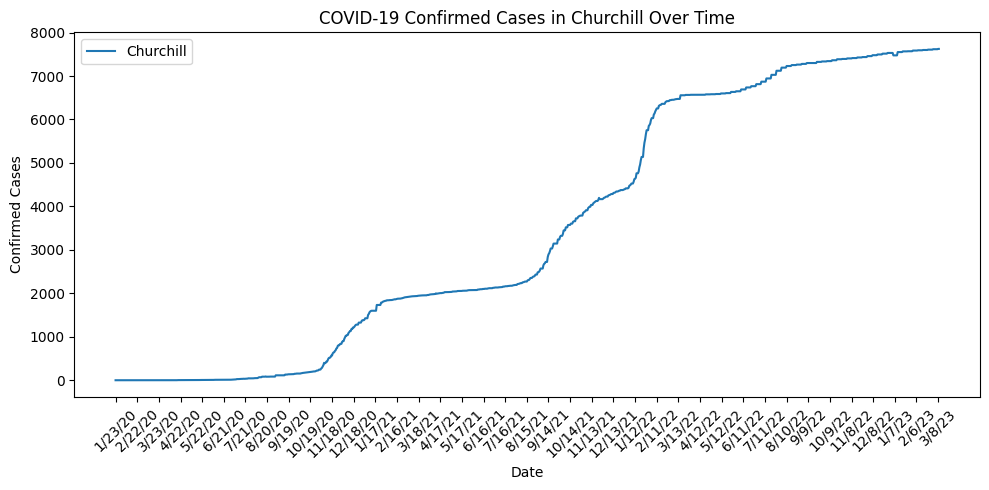

In [5]:
import matplotlib.pyplot as plt

churchill_death_df = deaths_dict['Churchill']
date_cols_deaths = churchill_death_df.columns[12:]
cases = churchill_death_df.iloc[0]

# Only select the date columns for plotting
death_dates = date_cols_deaths
deaths = cases[date_cols_deaths].astype(float)

plt.figure(figsize=(10, 5))
plt.plot(death_dates, deaths, label='Churchill')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths in Churchill Over Time')
tick_locs = range(0, len(death_dates), 30)
tick_labels = death_dates[tick_locs]
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

churchill_confirmed_df = confirmed_dict['Churchill']
date_cols = churchill_confirmed_df.columns[12:]
confirmed_cases_chill = churchill_confirmed_df.iloc[0]

# Only select the date columns for plotting
confirmed_dates = date_cols
confirmed_cases_chill = confirmed_cases_chill[date_cols].astype(float)

plt.figure(figsize=(10, 5))
plt.plot(confirmed_dates, confirmed_cases_chill, label='Churchill')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 Confirmed Cases in Churchill Over Time')
tick_locs = range(0, len(confirmed_dates), 30)
tick_labels = confirmed_dates[tick_locs]
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Code for plotting fraction of population infected over time in Churchill.

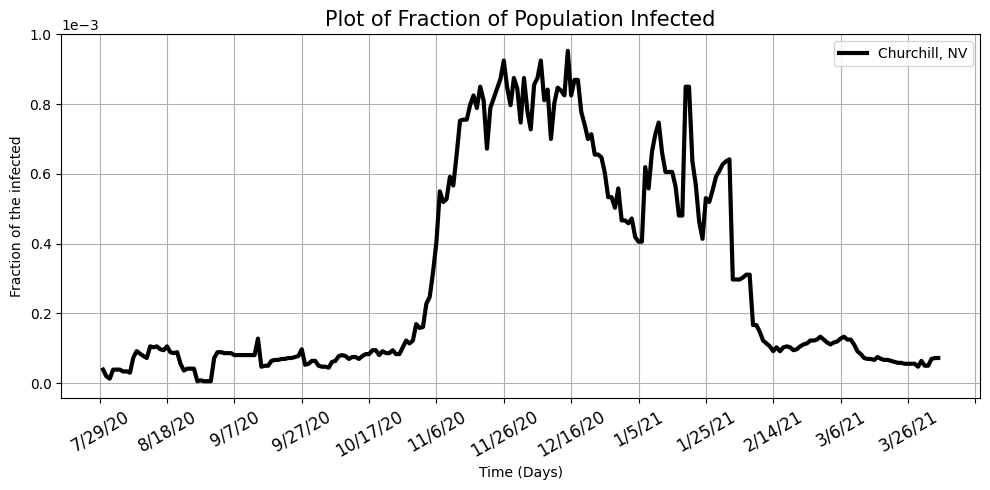

In [6]:
population = 25715   
num_days = 250     

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(churchill_confirmed_df.iloc[0,200:450].diff().rolling(14, min_periods = 1).mean()/population, label="Churchill, NV", color="k", linewidth=3)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xticks(rotation = 30,fontsize=12)
plt.legend(loc = 'best')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,4))
plt.xlabel('Time (Days)')
plt.ylabel('Fraction of the infected')
plt.title('Plot of Fraction of Population Infected',fontsize=15)
plt.grid()
plt.tight_layout()

plt.show()


We now restrict data to counties with population ~10k

In [15]:
# choose cities of interest
cities = ['Bullock', 'Coosa', 'Lowndes', 'Wilcox']
populations = [10357, 10387, 10311, 10600]

confirmed_dict = {}
deaths_dict = {}

# restrict to chosen cities
for index, city in enumerate(cities):
    new_df_confirmed = confirmed_cases[confirmed_cases['Admin2']==city]
    confirmed_dict[city] = new_df_confirmed
    new_df_deaths = deaths[deaths['Admin2']==city]
    deaths_dict[city] = new_df_deaths
    print(confirmed_dict)
    confirmed_dict[city]['Population'] = populations[index]
    deaths_dict[city]['Population'] = populations[index]
    

{'Bullock':         UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
5  84001011   US  USA    840  1011.0  Bullock        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
5  32.100305 -85.712655  ...    3020    3025    3025    3025    3025    3025   

   3/6/23  3/7/23  3/8/23  3/9/23  
5    3025    3025    3030    3030  

[1 rows x 1154 columns]}
{'Bullock':         UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
5  84001011   US  USA    840  1011.0  Bullock        Alabama             US   

         Lat      Long_  ... 3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  \
5  32.100305 -85.712655  ...   3025    3025    3025    3025    3025    3025   

   3/7/23  3/8/23  3/9/23  Population  
5    3025    3030    3030       10357  

[1 rows x 1155 columns], 'Coosa':          UID iso2 iso3  code3    FIPS Admin2 Province_State Country_Region  \
18  84001037   US  USA    840  1037.0  Coosa   

C:\Users\amyyy\AppData\Local\Temp\ipykernel_26804\1794269952.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_dict[city]['Population'] = populations[index]
C:\Users\amyyy\AppData\Local\Temp\ipykernel_26804\1794269952.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_dict[city]['Population'] = populations[index]
C:\Users\amyyy\AppData\Local\Temp\ipykernel_26804\1794269952.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [ ]:
print(confirmed_dict)

In [20]:
import matplotlib.pyplot as plt
max_fraction = 0
fractions = []
for idx, city in enumerate(cities):
    # Select the row in confirmed_cases where Admin2 matches the city name
    city_df = confirmed_cases[confirmed_cases['Admin2'] == city]
    population = populations[idx]
    # Find the date columns (skip non-date columns)
    date_cols = city_df.columns[city_df.columns.get_loc('Combined_Key')+1:]
    # Use only the first row for each city (in case of duplicates)
    if not city_df.empty:
        series = city_df.iloc[0][date_cols].astype(float)
        fraction = series.diff().rolling(14, min_periods=1).mean()
        fractions.append(fraction)
        max_fraction = max(max_fraction, fraction.max())
    else:
        # If city not found, append zeros
        fractions.append(pd.Series([0]*len(date_cols), index=date_cols))

plt.figure(figsize=(12, 7))
for idx, city in enumerate(cities):
    plt.plot(date_cols, fractions[idx], label=f"City: {city}", linewidth=2)
plt.title('Number of Population Infected (14-day rolling mean)', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Fraction infected')
plt.ylim(0, max_fraction * 1.05)
plt.grid(True)
plt.legend()
plt.xticks(ticks=range(0, len(date_cols), 60), labels=date_cols[::60], rotation=30)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Get cumulative cases for the county 
cases = series.values

# Find the first 14 days after 10th case
start_idx = np.argmax(cases > 10)
end_idx = start_idx + 14
y = cases[start_idx:end_idx]
x = np.arange(len(y)).reshape(-1, 1)

# Take log (avoid log(0) by filtering zeros)
mask = y > 0
y_log = np.log(y[mask])
x_log = x[mask]

# Linear regression
reg = LinearRegression().fit(x_log, y_log)
r = reg.coef_[0]

print(f"Estimated exponential growth rate r: {r:.3f}")

# Estimate R0 (assume infectious period D=5 days)
D = 5
R0 = 1 + r * D
print(f"Estimated R0: {R0:.2f}")

Estimated exponential growth rate r: 0.115
Estimated R0: 1.57
